In [9]:
include("../functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [2]:
## Initialize 

branchN = 200
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
v = 1.0

# Create an instance of the Constants struct
constants = fuConstants(N, L, b, v)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

4-element Vector{Float64}:
 0.4849384598859416
 1.0
 0.01
 1.0e-16

In [7]:
## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-14, solver = :NLSolver, max_iter = 1000, overwrite = false);

Solution branch already exists.
File: /home/karnav/Documents/kylindros/results/library/fu/fu_2410222138_N36.jld2
  0.005878 seconds (48.05 k allocations: 4.784 MiB)


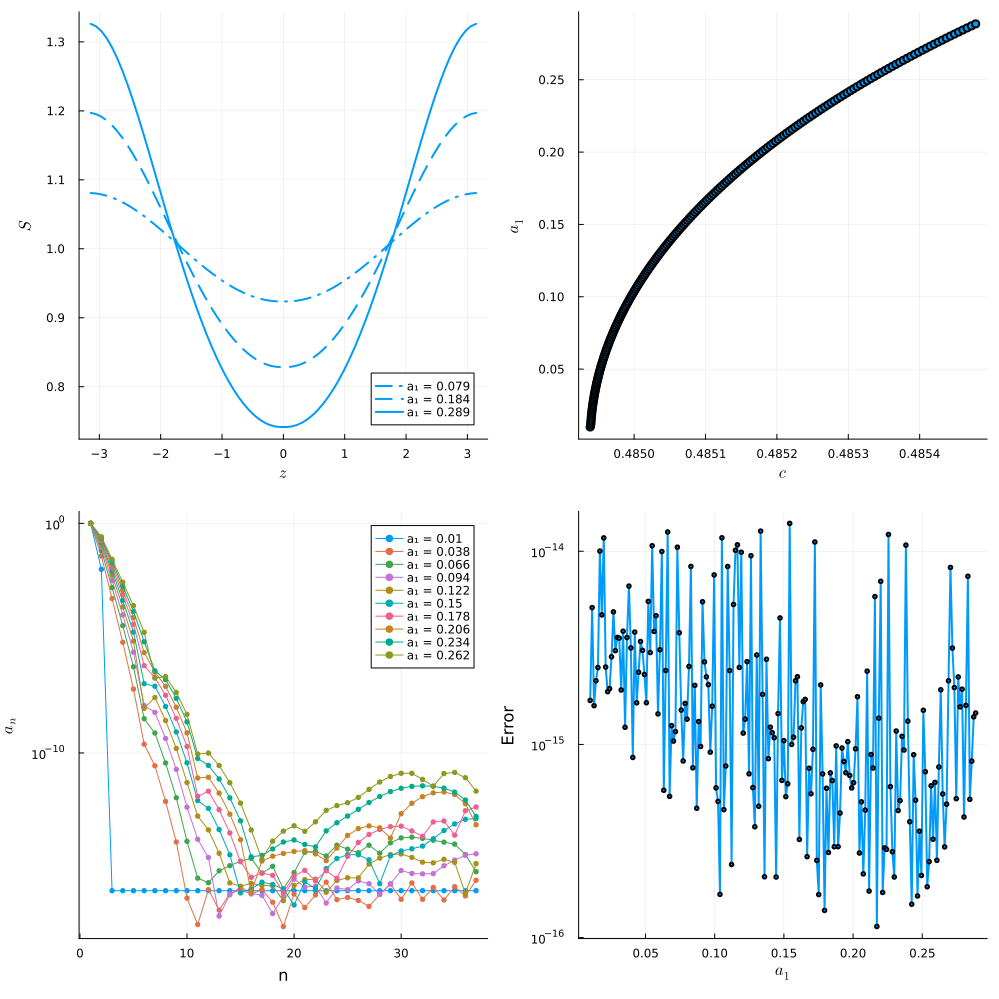

In [8]:
plotEverything(solutions, constants, metadata)

Plot condition number:

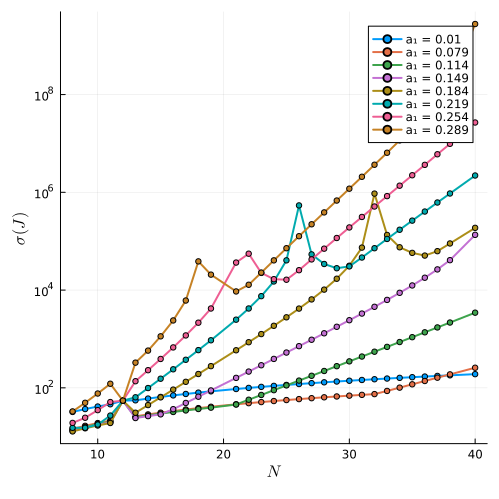

In [8]:
plot_metric_vs_N("/home/karnav/Documents/kylindros/results/experiments/fu_vary_coeffs"; indices=[1, 50, 75, 100, 125, 150, 175, 200], metric=:condition)

Plotting branches with v = 1.061578947368421
Filtered to 9 branches with L ∈ [π, 14]


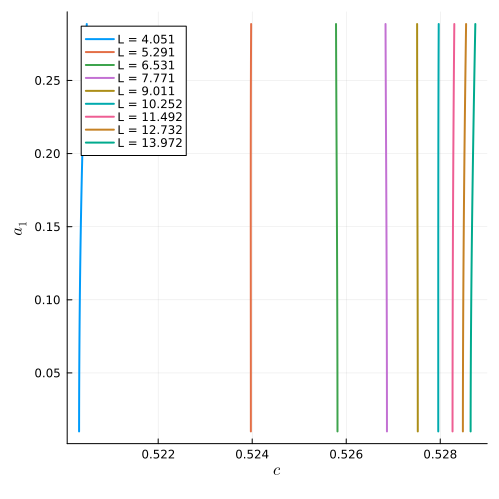

In [3]:
path = "/home/karnav/Documents/kylindros/results/experiments/fu_grid_search"
plotBranchVariations(path; constant_param=:v, constant_value=1.0, varied_param_range=(π, 14))

In [ ]:
path = "/home/karnav/Documents/kylindros/results/experiments/fu_grid_search"
# plotBranchVariationsSubplots(path, constant_param = :v, constant_value = 4)
plotBranchVariationsSubplots(path, constant_param = :v, constant_value = 1, varied_param_range = (π, 14))
# savefig("fu_v_branch_variations.pdf")

Plotting branches with v = 1.061578947368421
Filtered to 9 branches with L ∈ [π, 14]


"/home/karnav/Documents/kylindros/notebooks/fu_v_branch_variations.pdf"

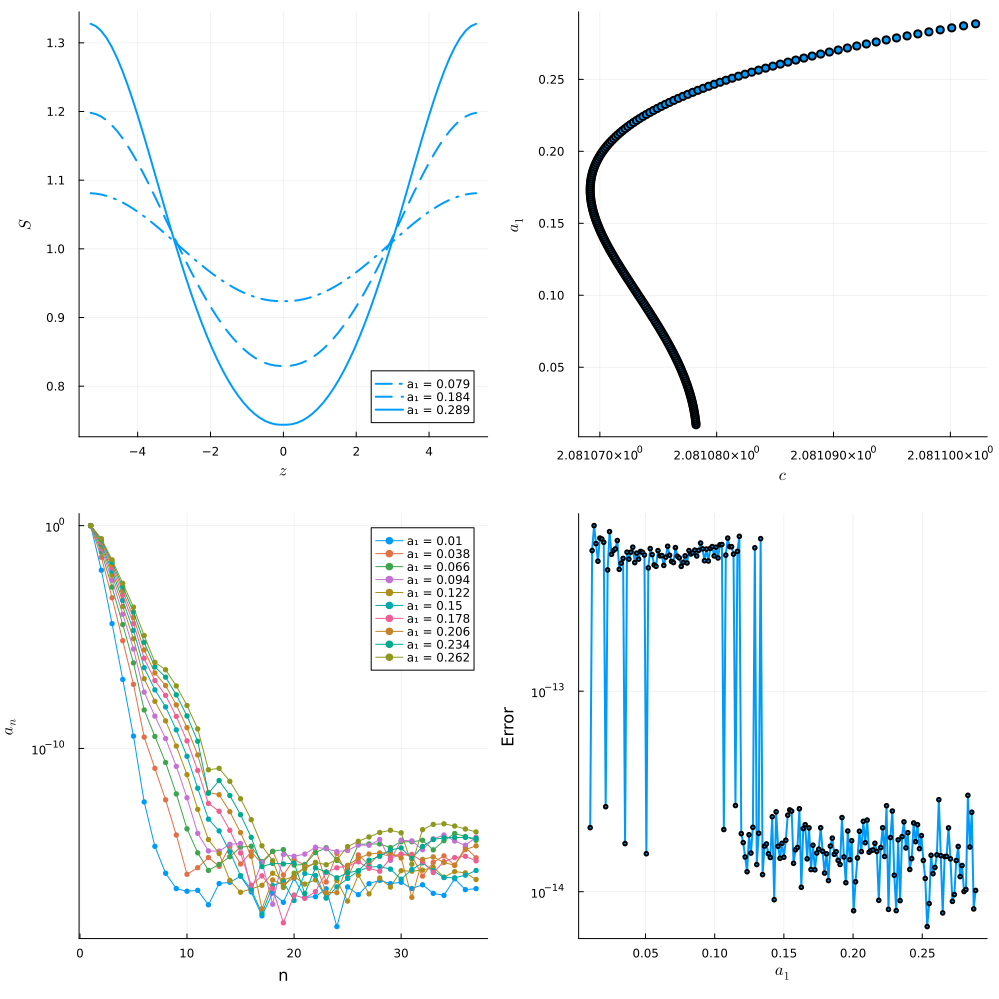

In [10]:
path = "/home/karnav/Documents/kylindros/results/experiments/fu_grid_search/fu_2410004652_N36.jld2"
solutions, constants, metadata = readSolution(path);

plotEverything(solutions, constants, metadata)

# Old code: 

### **Dispersion Relation**

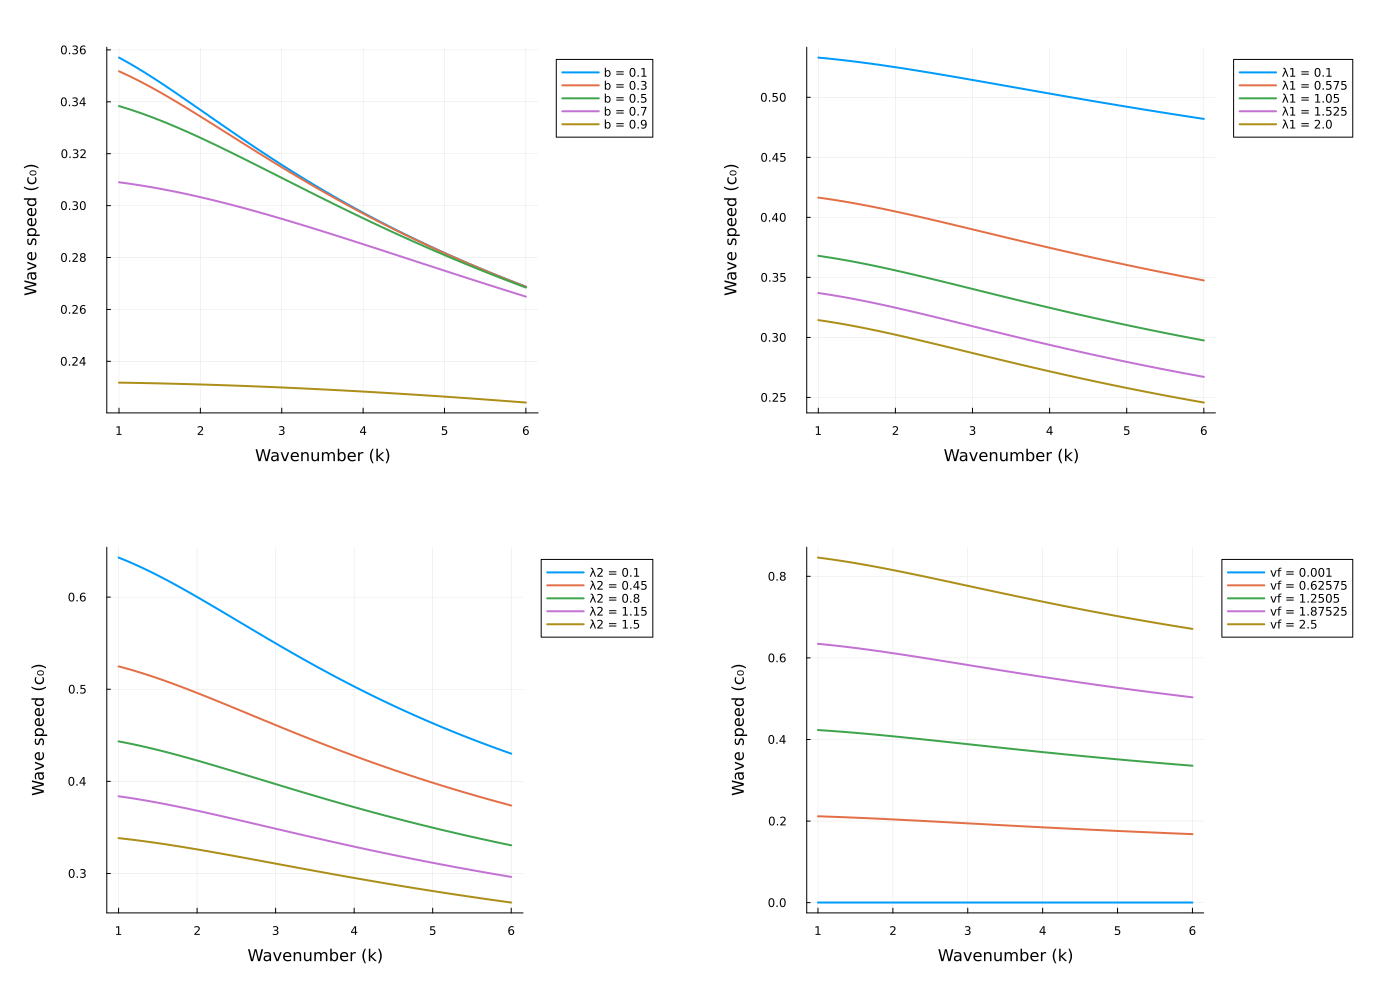

In [2]:
N = 36
L = π
b = 0.5
λ1 = 1.5
λ2 = 1.5
vf = 1.0

constants = fuConstants(N, L, b, λ1, λ2, vf)

k_range = range(1, 6, length=100)

pb = plot_dispersion(k_range, constants, vary_param = :b, param_range = range(0.1, 0.9, length=5))
pλ1 = plot_dispersion(k_range, constants, vary_param = :λ1, param_range = range(0.1, 2.0, length=5))
pλ2 = plot_dispersion(k_range, constants, vary_param = :λ2, param_range = range(0.1, 1.5, length=5))
pvf = plot_dispersion(k_range, constants, vary_param = :vf, param_range = range(0.001, 2.5, length=5))

plot(pb, pλ1, pλ2, pvf, layout=(2,2), size=(1400, 1000), margin=10mm)

In [3]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.5
λ2 = 1.5
λ1 = 1.0
vf = 1.0

# Create an instance of the Constants struct
constants = fuConstants(N, L, b, λ1, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :myLevenbergMarquardt, max_iter = 10000, overwrite = true);

ArgumentError: ArgumentError: matrix contains Infs or NaNs

In [8]:
plotEverything(solutions, constants, metadata)

UndefVarError: UndefVarError: `solutions` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [8]:
# testing if simple fu model and general fu model give same results 

# set parameters 
N = 36
L = π
b = 0.5
λ2 = 1.5
λ1 = 1.0
vf = 1.0

# create constants
fusimple = fuSimpleConstants(N, L, b, λ2, vf)
fu = fuConstants(N, L, b, λ1, λ2, vf)

# initialize wave speed and wave number 
k1fu = 1*π/fu.L
cInitialfu = c0(k1, fu)

k1fusimple = 1*π/fusimple.L
cInitialfusimple = c0(k1, fusimple)

0.0

In [9]:
cInitialfu

0.37197020836704314

In [10]:
cInitialfusimple

0.37197020836704314

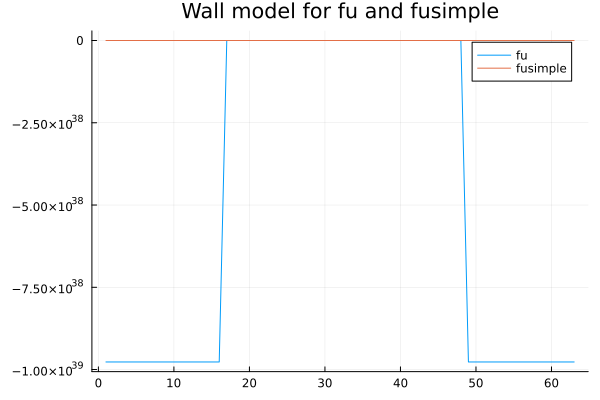

In [14]:
# create a simple S vector 
S = cos.(-pi:0.1:pi)

# compute wall model for both models 
wallfu = wall_model(fu, cInitialfu, S)
wallfusimple = wall_model(fusimple, cInitialfusimple, S)

# plot wall models
plot(wallfu, label="fu", title="Wall model for fu and fusimple")
plot!(wallfusimple, label="fusimple")